# Evaluating a machine learning model

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

### Three ways to evaluate Scikit-Learn models/estimators:
1. Estimator's built-in score() method  
2. The scoring parameter  
3. Problem-specific metric functions
   
You can read more about these here:  
https://scikit-learn.org/stable/modules/model_evaluation.html

## 1. Evaluating the model with `score` method

### 1.1 Classification Problem

In [7]:
heart_disease = pd.read_csv("resources/heart-disease.csv")
heart_disease.head()

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=1000)

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

,n_estimators,1000
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [8]:
# The highest value for the .score() method is 1.0, the lowest is 0.0
clf.score(X_train, y_train)

1.0

In [9]:
clf.score(X_test, y_test)

0.8688524590163934

### 1.2 Regression Problem

In [11]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

# Getting it into a dataframe
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df.head()

# Add a target variable to the dataframe from our dataset
housing_df["target"] = housing["target"]
housing_df.head()

from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
model = RandomForestRegressor(n_estimators=100)

# Fit the model to the data
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [12]:
# The default score() evaluation metric is r_squared for regression algorithms
# Highest = 1.0, lowest = 0.0
model.score(X_test, y_test)

0.8066196804802649

## 2. Evaluating a model using the `scoring` parameter

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train);

In [15]:
clf.score(X_test, y_test)

0.8524590163934426

The cross_val_score function in scikit-learn evaluates a model's performance using cross-validation. It repeatedly splits the data into training and testing sets, trains the model on the training data, and computes a score on the test data for each split (or "fold"). The function returns an array of these scores, providing a more robust estimate of how the model is expected to perform on unseen data compared to a single train-test split. 

In [16]:
cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [17]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [18]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [19]:
# Default scoring parameter of classifier = mean accuracy
# clf.score()
# Scoring parameter set to None by default 
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 2.1 Classification model evaluation metrics
* Accuracy  
* Area under ROC curve  
* Confusion matrix  
* Classification report  

#### 2.1.1 Accuracy

In [39]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [43]:
np.mean(cross_val_score)

0.8248087431693989

In [45]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) *100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


#### 2.1.2 Area under the receiver operating characteristic curve (AUC/ROC)

* Area under curve (AUC)  
* Receiver Operating Characteristics (ROC curve)  

ROC curves are a comparison of a model's `true postive rate (tpr)` versus a models `false positive rate (fpr)`.

* True positive = model predicts 1 when truth is 1  
* False positive = model predicts 1 when truth is 0  
* True negative = model predicts 0 when truth is 0  
* False negative = model predicts 0 when truth is 1

For more information on these metrics, bookmark the following resources and refer to them when you need:  

[ROC and AUC, Clearly Explained!](https://www.youtube.com/watch?v=4jRBRDbJemM) by StatQuest  
[ROC documentation in Scikit-Learn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html) (contains code examples)  
[How the ROC curve and AUC are calculated](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc) by Google's Machine Learning team   

In [48]:
# Create X_test... etc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [50]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [52]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [54]:
# Caculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

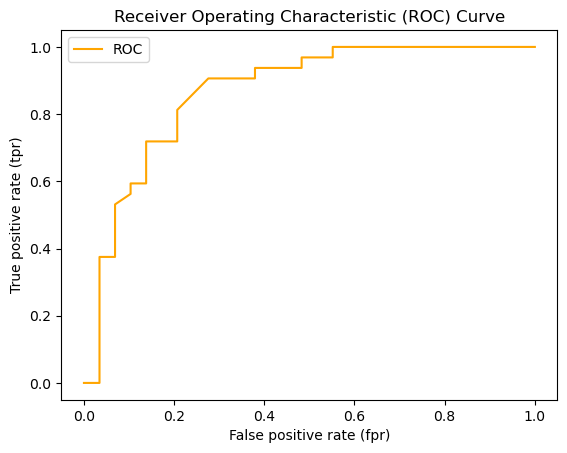

In [56]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    #plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)


In [58]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

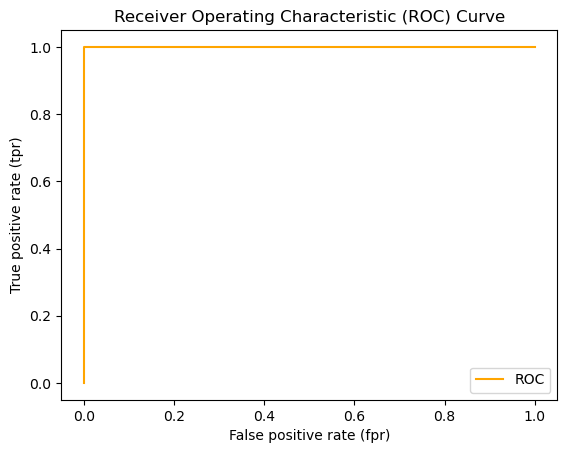

In [60]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [62]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

#### 2.1.3 Confusion matrix
The next way to evaluate a classification model is by using a [confusion matrix.](https://en.wikipedia.org/wiki/Confusion_matrix)  

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. In essence, giving you an idea of where the model is getting confused.